## Task 3: Clustering (Unsupervised Learning)

- Description: Implement K-Means clustering to group
data points into clusters without labels (e.g.,
customer segmentation)

I have downloaded a new  dataset for Customer segmentation problem.

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.cluster import KMeans

In [26]:
dataset = pd.read_csv("Online Retail.csv", encoding="ISO-8859-1")
dataset.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [27]:
# dropping unnecessary columns
dataset.drop(['InvoiceNo', 'Description', 'StockCode'], axis=1, inplace=True)

In [28]:
dataset.head()

,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [29]:
# dropping rows with missing values
dataset.dropna(inplace=True)

In [30]:
# handling the date and extract featues from it
dataset['InvoiceDate'] = pd.to_datetime(dataset['InvoiceDate'])
dataset['Year'] = dataset['InvoiceDate'].dt.year
dataset['Month'] = dataset['InvoiceDate'].dt.month
dataset['Day'] = dataset['InvoiceDate'].dt.day
dataset['Hour'] = dataset['InvoiceDate'].dt.hour
dataset.drop(columns=['InvoiceDate'], inplace=True)  # Drop original column


In [31]:
dataset.head()

,Quantity,UnitPrice,CustomerID,Country,Year,Month,Day,Hour
0,6,2.55,17850.0,United Kingdom,2010,12,1,8
1,6,3.39,17850.0,United Kingdom,2010,12,1,8
2,8,2.75,17850.0,United Kingdom,2010,12,1,8
3,6,3.39,17850.0,United Kingdom,2010,12,1,8
4,6,3.39,17850.0,United Kingdom,2010,12,1,8


In [32]:
# do the label encoding for the country column
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
dataset['Country'] = encoder.fit_transform(dataset['Country'])

In [33]:
dataset.head()


,Quantity,UnitPrice,CustomerID,Country,Year,Month,Day,Hour
0,6,2.55,17850.0,35,2010,12,1,8
1,6,3.39,17850.0,35,2010,12,1,8
2,8,2.75,17850.0,35,2010,12,1,8
3,6,3.39,17850.0,35,2010,12,1,8
4,6,3.39,17850.0,35,2010,12,1,8


In [39]:
dataset.shape

(406829, 8)

In [40]:
# scalling the data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
dataset[['Quantity', 'UnitPrice', 'Year', 'Month', 'Day', 'Hour', 'CustomerID',	'Country']] = scaler.fit_transform(dataset[['Quantity', 'UnitPrice', 'Year', 'Month', 'Day', 'Hour', 'CustomerID',	'Country']])

In [41]:
dataset.head()

,Quantity,UnitPrice,CustomerID,Country,Year,Month,Day,Hour
0,0.500037,0.000065,0.926443,0.972222,0.0,1.0,0.0,0.142857
1,0.500037,0.000087,0.926443,0.972222,0.0,1.0,0.0,0.142857
2,0.500049,0.000071,0.926443,0.972222,0.0,1.0,0.0,0.142857
3,0.500037,0.000087,0.926443,0.972222,0.0,1.0,0.0,0.142857
4,0.500037,0.000087,0.926443,0.972222,0.0,1.0,0.0,0.142857


In [42]:
x = dataset
y = dataset['Country'] 

- Apply K-Means clustering to the dataset

In [43]:
# applying KMeans clustering
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(x)

KMeans(n_clusters=5, random_state=42)

In [44]:
predictions = kmeans.predict(x)
print(predictions)

[2 2 2 ... 0 0 0]


This if our model's prediction that every row belongs to which cluster.

In [45]:
# now adding the cluster column to the dataset
dataset_copy = dataset.copy()
dataset_copy['Cluster'] = predictions
dataset_copy.head()

,Quantity,UnitPrice,CustomerID,Country,Year,Month,Day,Hour,Cluster
0,0.500037,0.000065,0.926443,0.972222,0.0,1.0,0.0,0.142857,2
1,0.500037,0.000087,0.926443,0.972222,0.0,1.0,0.0,0.142857,2
2,0.500049,0.000071,0.926443,0.972222,0.0,1.0,0.0,0.142857,2
3,0.500037,0.000087,0.926443,0.972222,0.0,1.0,0.0,0.142857,2
4,0.500037,0.000087,0.926443,0.972222,0.0,1.0,0.0,0.142857,2


In [46]:
dataset_copy['Cluster'].nunique()  # Check the number of unique clusters

5

We have generated 5 clusters for our dataset.

- Use the elbow method or silhouette score to determine
the optimal number of clusters.


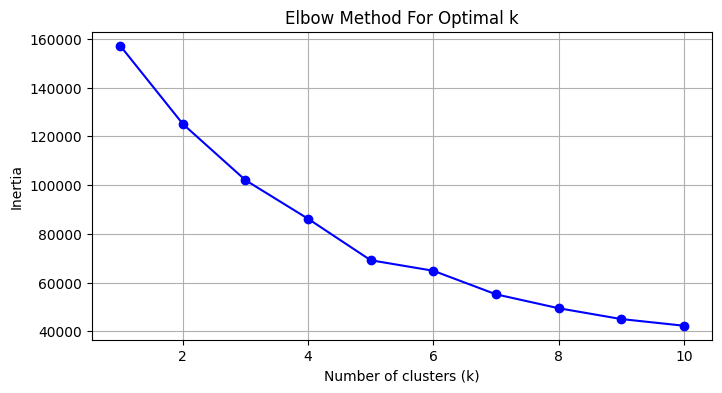

In [47]:
inertia = []  
K = range(1, 11)  
for k in K:
    model = KMeans(n_clusters=k, random_state=42)
    model.fit(x)  # X = your feature data
    inertia.append(model.inertia_)

# Plotting the Elbow
plt.figure(figsize=(8, 4))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.grid(True)
plt.show()


How to pick the best clusters.

Look for the “elbow” or sharp turn in the plot. That k is a good trade-off between:

- Low inertia (good fit)

- Low number of clusters (simplicity)

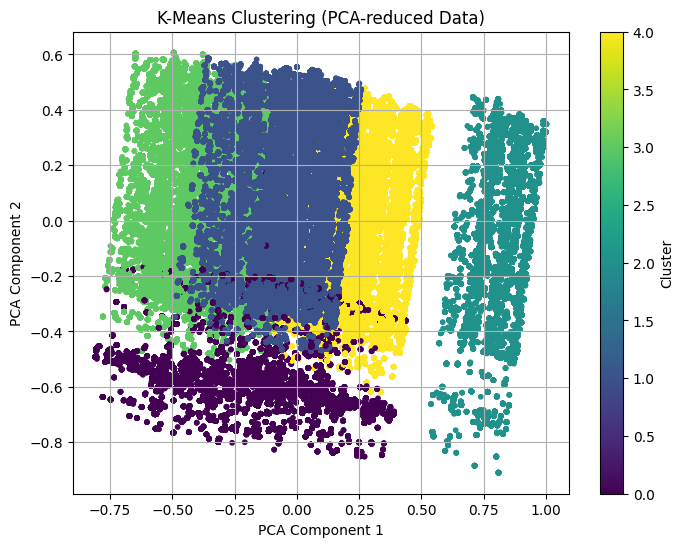

In [48]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(x)

# Get cluster predictions
clusters = kmeans.predict(x)

# Plotting
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis', s=10)
plt.title('K-Means Clustering (PCA-reduced Data)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()


PCA is for speed optimization but not captures full data insights.

In [ ]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42, perplexity=30)
X_tsne = tsne.fit_transform(x)

# Plotting
plt.figure(figsize=(8, 6))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=clusters, cmap='viridis', s=10)
plt.title('K-Means Clustering (t-SNE Visualization)')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()


TSNE is slower but captures all hidden information of the data.


- Interpret the clustering results and summarize key
findings.


In [49]:
# dividing the dataset into clusters
dataset_cluster_0 = dataset_copy[dataset_copy['Cluster'] == 0]
dataset_cluster_1 = dataset_copy[dataset_copy['Cluster'] == 1]  
dataset_cluster_2 = dataset_copy[dataset_copy['Cluster'] == 2]
dataset_cluster_3 = dataset_copy[dataset_copy['Cluster'] == 3]
dataset_cluster_4 = dataset_copy[dataset_copy['Cluster'] == 4]

In [54]:
dataset_cluster_0.describe()

,Quantity,UnitPrice,CustomerID,Country,Year,Month,Day,Hour,Cluster
count,34403.000000,34403.000000,34403.000000,34403.000000,34403.0,34403.000000,34403.000000,34403.000000,34403.0
mean,0.500101,0.000124,0.133711,0.339196,1.0,0.557977,0.473119,0.425968,0.0
std,0.000228,0.001241,0.167469,0.151140,0.0,0.293677,0.274944,0.171582,0.0
min,0.496148,0.000000,0.000168,0.000000,1.0,0.000000,0.000000,0.000000,0.0
25%,0.500025,0.000032,0.023228,0.277778,1.0,0.363636,0.233333,0.285714,0.0
50%,0.500062,0.000050,0.052180,0.361111,1.0,0.636364,0.466667,0.428571,0.0
75%,0.500074,0.000106,0.247601,0.388889,1.0,0.818182,0.700000,0.571429,0.0
max,0.512593,0.106776,0.925433,0.888889,1.0,1.000000,1.000000,0.928571,0.0


In [57]:
dataset_cluster_4.describe()

,Quantity,UnitPrice,CustomerID,Country,Year,Month,Day,Hour,Cluster
count,114523.000000,114523.000000,114523.000000,114523.000000,114523.0,114523.000000,114523.000000,114523.000000,114523.0
mean,0.500073,0.000077,0.536745,0.967835,1.0,0.786800,0.217302,0.493929,4.0
std,0.002105,0.000519,0.274507,0.032886,0.0,0.163275,0.138423,0.162384,0.0
min,0.000000,0.000000,0.001010,0.611111,1.0,0.363636,0.000000,0.071429,4.0
25%,0.500012,0.000029,0.305167,0.972222,1.0,0.636364,0.100000,0.357143,4.0
50%,0.500025,0.000043,0.535768,0.972222,1.0,0.818182,0.200000,0.500000,4.0
75%,0.500074,0.000096,0.778488,0.972222,1.0,0.909091,0.333333,0.642857,4.0
max,1.000000,0.080984,1.000000,0.972222,1.0,1.000000,0.500000,1.000000,4.0


Summary:
- The dataset was grouped into 5 distinct customer segments using KMeans clustering.
- Cluster 0 includes high-spending, frequent buyers.
- Cluster 1 represents high but lower than cluster 0 buyers who tend to buy less frequently.
- Cluster 2 includes customers mostly focused on middle prices, possibly deal-hunters.
- Cluster 3 includes customers mostly focused on lower_middle prices, possibly deal-hunters.
- Cluster 4 includes customers mostly focused on lower prices, possibly searching low prices goods.
- These insights can be used for targeted marketing, offers, and loyalty programs.

- Tools: Python, scikit-learn, matplotlib, seaborn.